## Setup

This is similar to the [iris classification](./iris_classification.ipynb) notebook, but the goal here is simply to implement a clustering algorithm.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set()

iris = load_iris()
x = iris["data"]
y = iris["target"]
labels = iris["target_names"]

In [2]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

## Dimensionality Reduction and Plotting

Now I will reduce the dimensionality of the feature space using PCA. I will use a scree plot to evaluate how much to reduce the dimensionality by.

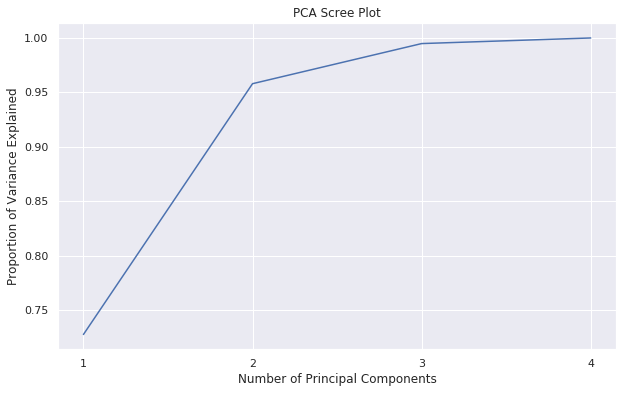

In [3]:
pca = PCA(n_components=4)
pca.fit(x)
total_explained_variance = pca.explained_variance_ratio_.cumsum()

_, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, 5), total_explained_variance)
ax.set(xlabel="Number of Principal Components",
       ylabel="Proportion of Variance Explained",
       title="PCA Scree Plot",
       xticks=[1, 2, 3, 4]);

From this plot, over 99% of the variation in the features is explained using just the first 2 principal components. Note that the definiton of "variance" here is a bit funny and is reated to but distinct from the usual definition in statistics.

In [4]:
pca2 = PCA(n_components=2)
pca2.fit(x)
x_pca = pca2.transform(x)

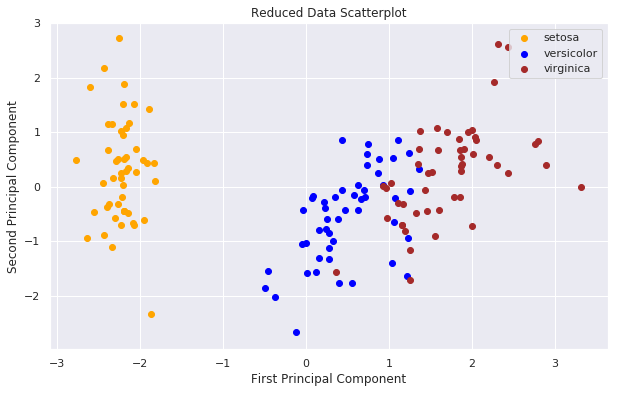

In [5]:
_, ax = plt.subplots(figsize=(10, 6))
for target, color in enumerate(["orange", "blue", "brown"]):
    ax.scatter(x_pca[y == target, 0],
               x_pca[y == target, 1],
               c=color, label=labels[target])
    
ax.legend()
ax.set(xlabel="First Principal Component",
       ylabel="Second Principal Component",
       title="Reduced Data Scatterplot");

## Clustering

Here I will just train a simple logistic regression model (one-vs-rest to account for the multiple classes) and plot the resulting predictions.

In [6]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(x);

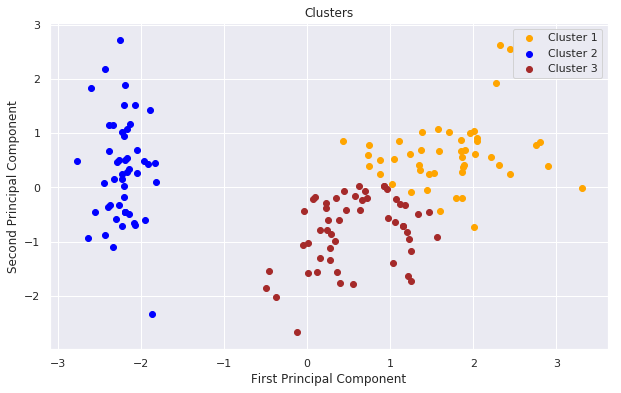

In [7]:
clusters = model.labels_

_, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x_pca[clusters==0, 0],
           x_pca[clusters==0, 1],
           label="Cluster 1", color="orange")
ax.scatter(x_pca[clusters==1, 0],
           x_pca[clusters==1, 1],
           label="Cluster 2", color="blue")
ax.scatter(x_pca[clusters==2, 0],
           x_pca[clusters==2, 1],
           label="Cluster 3", color="brown")
ax.legend()
ax.set(xlabel="First Principal Component",
       ylabel="Second Principal Component",
       title="Clusters");

Comparing with the plot colored by target value rather than cluster, we can see that:
- Cluster 1 corresponds to virginica
- Cluster 2 corresponds to setosa
- Cluster 3 corresponds to versicolor

Now we can see how well our clustering performed by saying that the targets in the original dataset represent known clusters (I don't think this would ever be done in real life, because the labels obviate the need for the clustering, but what the hell?).

In [8]:
num_in_correct_cluster = np.sum((clusters == 0) & (y == 1)) + \
                         np.sum((clusters == 1) & (y == 2)) + \
                         np.sum((clusters == 2) & (y == 0))
num_in_correct_cluster / len(y)

0.07333333333333333